In [93]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg
import seaborn as sns
import pprint

In [40]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [41]:
title_text_metagenres_metascore_df = pd.read_hdf("./data/out/title_metasummary_metagenres_metascore_amorality_multilabel.h5")
title_text_metagenres_metascore_df['meta_score'] = pd.to_numeric(title_script_metagenres_metascore_df['meta_score'])

In [42]:
list(title_text_metagenres_metascore_df.columns)[4:]

['Glorifying Violence']

In [43]:
title_text_metagenres_metascore_df.corr(numeric_only=True)

,meta_score,Glorifying Violence
meta_score,1.000000,-0.196128
Glorifying Violence,-0.196128,1.000000


In [44]:
meta_genres = title_text_metagenres_metascore_df["meta_genres"].explode().unique() 

In [55]:
dict_of_genre_dfs = {}
for genre in meta_genres:
    genre_df = title_script_metagenres_metascore_df[
        title_script_metagenres_metascore_df.meta_genres.apply(lambda x: genre in x)]
    dict_of_genre_dfs[genre] = genre_df

In [106]:
for genre, genre_df in dict_of_genre_dfs.items():
    display(genre, pg.corr(genre_df['Glorifying Violence'], genre_df['meta_score']).round(3))

'Comedy'

,n,r,CI95%,p-val,BF10,power
pearson,281,-0.229,"[-0.34, -0.12]",0.0,132.5,0.974


'Drama'

,n,r,CI95%,p-val,BF10,power
pearson,539,-0.142,"[-0.22, -0.06]",0.001,12.349,0.911


'Romance'

,n,r,CI95%,p-val,BF10,power
pearson,189,-0.083,"[-0.22, 0.06]",0.257,0.172,0.205


'Crime'

,n,r,CI95%,p-val,BF10,power
pearson,213,-0.177,"[-0.3, -0.04]",0.009,2.424,0.74


'Thriller'

,n,r,CI95%,p-val,BF10,power
pearson,312,-0.088,"[-0.2, 0.02]",0.119,0.238,0.345


'Mystery'

,n,r,CI95%,p-val,BF10,power
pearson,128,-0.105,"[-0.27, 0.07]",0.239,0.219,0.218


'Sci-Fi'

,n,r,CI95%,p-val,BF10,power
pearson,141,-0.089,"[-0.25, 0.08]",0.295,0.181,0.183


'Biography'

,n,r,CI95%,p-val,BF10,power
pearson,84,-0.029,"[-0.24, 0.19]",0.79,0.141,0.058


'History'

,n,r,CI95%,p-val,BF10,power
pearson,32,-0.315,"[-0.6, 0.04]",0.079,0.966,0.429


'Adventure'

,n,r,CI95%,p-val,BF10,power
pearson,158,-0.112,"[-0.26, 0.05]",0.163,0.261,0.287


'Fantasy'

,n,r,CI95%,p-val,BF10,power
pearson,92,-0.345,"[-0.51, -0.15]",0.001,34.921,0.927


'Sport'

,n,r,CI95%,p-val,BF10,power
pearson,32,0.057,"[-0.3, 0.4]",0.757,0.23,0.061


'Action'

,n,r,CI95%,p-val,BF10,power
pearson,228,0.004,"[-0.13, 0.13]",0.958,0.083,0.05


'Horror'

,n,r,CI95%,p-val,BF10,power
pearson,89,-0.169,"[-0.36, 0.04]",0.114,0.454,0.355


'Animation'

,n,r,CI95%,p-val,BF10,power
pearson,30,-0.331,"[-0.62, 0.03]",0.074,1.038,0.441


'Family'

,n,r,CI95%,p-val,BF10,power
pearson,46,-0.309,"[-0.55, -0.02]",0.037,1.53,0.562


'Musical'

,n,r,CI95%,p-val,BF10,power
pearson,16,0.268,"[-0.26, 0.67]",0.316,0.491,0.174


'Music'

,n,r,CI95%,p-val,BF10,power
pearson,23,-0.313,"[-0.64, 0.11]",0.146,0.702,0.314


'Western'

,n,r,CI95%,p-val,BF10,power
pearson,11,0.235,"[-0.42, 0.73]",0.487,0.459,0.108


'War'

,n,r,CI95%,p-val,BF10,power
pearson,32,-0.029,"[-0.37, 0.32]",0.875,0.222,0.052


'Documentary'

,n,r,CI95%,p-val,BF10,power
pearson,2,1.0,"[1.0, 1.0]",1.0,1.0,1


'Film-Noir'

,n,r,CI95%,p-val,BF10,power
pearson,2,-1.0,"[-1.0, -1.0]",1.0,1.0,1


<Axes: xlabel='Glorifying Violence', ylabel='meta_score'>

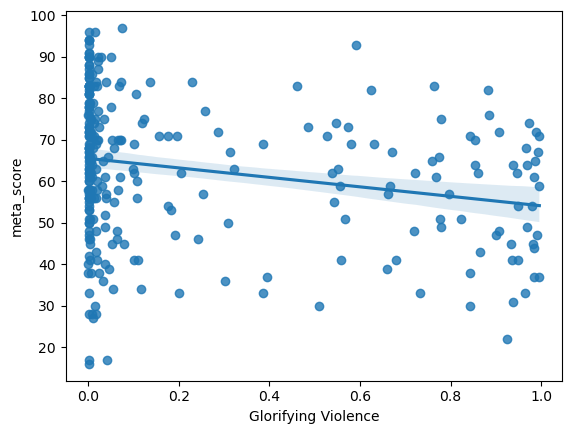

In [107]:
sns.regplot(x=dict_of_genre_dfs['Comedy']['Glorifying Violence'], y=dict_of_genre_dfs['Comedy']['meta_score'])